In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
import nltk
from sklearn.model_selection import train_test_split

In [28]:
df = pd.read_csv(r'C:\Users\Aeriu\Desktop\2020-12-31-DynamicallyGeneratedHateDataset-entries-v0.1.csv', dtype = str)

In [3]:
df.head()

,Unnamed: 0,id,text,label,type,model_wrong,db.model_preds,status,round,split,annotator
0,1,10000,It should be legal for a husband to rape his wife,hate,notgiven,TRUE,0.97457,dynabench entry,1,train,gnzuctwed3
1,2,10001,dalits are lowlife scum,hate,notgiven,FALSE,0.08233,dynabench entry,1,test,cagnluiznm
2,3,10002,dalits are lowlives,hate,notgiven,TRUE,0.92319,dynabench entry,1,train,cagnluiznm
3,4,10003,It was a better world when women dare not ques...,hate,notgiven,TRUE,0.99006,dynabench entry,1,test,gnzuctwed3
4,5,10004,I don't work this hard so that those immigrant...,hate,notgiven,TRUE,0.98836,dynabench entry,1,train,cagnluiznm


In [4]:
df.shape

(40623, 11)

In [5]:
df.columns

Index(['Unnamed: 0', 'id', 'text', 'label', 'type', 'model_wrong',
       'db.model_preds', 'status', 'round', 'split', 'annotator'],
      dtype='object')

In [6]:
# We only want the comment and label for our model
df = df[['text','label']]
dfhate = df[df['label'] == 'hate']['text']
dfnhate = df[df['label'] != 'hate']['text']

In [7]:
df.shape,dfhate.shape,dfnhate.shape

((40623, 2), (22124,), (18499,))

### Checking most popular words in comments labeled as hate speech

In [8]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
val = str(dfhate)

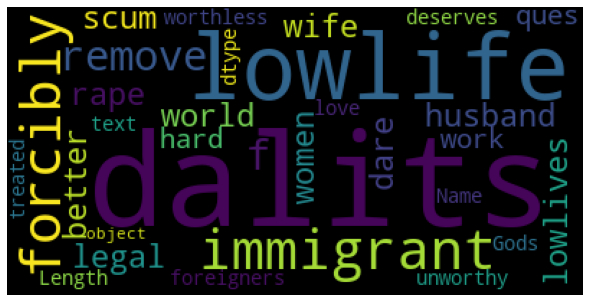

In [9]:
wordcloud = WordCloud(stopwords = stopwords).generate(val)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

### Checking most popular words in comments labeled as not hate speech

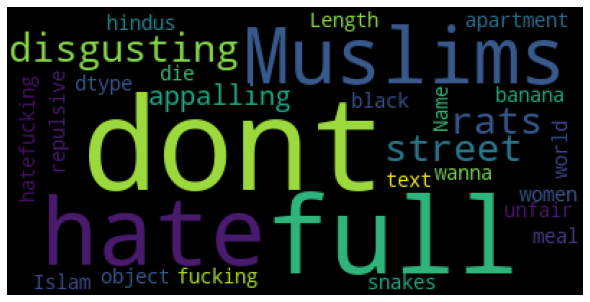

In [10]:
val2 = str(dfnhate)
wordcloud2 = WordCloud(stopwords = stopwords).generate(val2)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud2)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

## Logistic Regression: predict the probability of a comment being labeled as hatespeech

In [11]:
#cleaning
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [12]:
df['text'] = df['text'].apply(lambda x:''.join([i for i in x 
    if i not in string.punctuation]))

In [13]:
df

,text,label
0,It should be legal for a husband to rape his wife,hate
1,dalits are lowlife scum,hate
2,dalits are lowlives,hate
3,It was a better world when women dare not ques...,hate
4,I dont work this hard so that those immigrants...,hate
...,...,...
40618,we should forcibly remove all the foreigners f...,hate
40619,we should forcibly remove all the immigrants f...,hate
40620,dalits are unworthy of the Gods love,hate
40621,dalits are worthless,hate


### White Space Tokenizing

In [14]:
from nltk.tokenize import WhitespaceTokenizer
tk = WhitespaceTokenizer()
df['token'] = df['text'].apply(lambda x: tk.tokenize(x.lower()))

In [15]:
df.head()

,text,label,token
0,It should be legal for a husband to rape his wife,hate,"[it, should, be, legal, for, a, husband, to, r..."
1,dalits are lowlife scum,hate,"[dalits, are, lowlife, scum]"
2,dalits are lowlives,hate,"[dalits, are, lowlives]"
3,It was a better world when women dare not ques...,hate,"[it, was, a, better, world, when, women, dare,..."
4,I dont work this hard so that those immigrants...,hate,"[i, dont, work, this, hard, so, that, those, i..."


In [16]:
# removing stopwords
from nltk.corpus import stopwords
def remove_stopwords(text):
    words = [w for w in text if w not in stopwords.words('english')]
    return words
df['token'] = df['token'].apply(lambda x : remove_stopwords(x))

In [17]:
df.head()

,text,label,token
0,It should be legal for a husband to rape his wife,hate,"[legal, husband, rape, wife]"
1,dalits are lowlife scum,hate,"[dalits, lowlife, scum]"
2,dalits are lowlives,hate,"[dalits, lowlives]"
3,It was a better world when women dare not ques...,hate,"[better, world, women, dare, question, men]"
4,I dont work this hard so that those immigrants...,hate,"[dont, work, hard, immigrants, take, benefits]"


### Lemmatizing vs stemming comparison

In [18]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def word_lemmatizer(text):
    lem_text = [lemmatizer.lemmatize(i) for i in text]
    return lem_text
df['token'].apply(lambda x : word_lemmatizer(x))

0                        [legal, husband, rape, wife]
1                             [dalits, lowlife, scum]
2                                  [dalits, lowlives]
3         [better, world, woman, dare, question, men]
4        [dont, work, hard, immigrant, take, benefit]
                             ...                     
40618                   [forcibly, remove, foreigner]
40619                   [forcibly, remove, immigrant]
40620                   [dalits, unworthy, god, love]
40621                             [dalits, worthless]
40622            [dalits, deserves, treated, lowlife]
Name: token, Length: 40623, dtype: object

In [25]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
def word_stemmer(text):
    stem_text = [stemmer.stem(i) for i in text]
    return stem_text
tokens = df['token'].apply(lambda x : word_stemmer(x))

### We will use stemming because it is more robust for this dataset

In [20]:
df['token'] = df['token'].apply(lambda x : word_stemmer(x))
df.head()

,text,label,token
0,It should be legal for a husband to rape his wife,hate,"[legal, husband, rape, wife]"
1,dalits are lowlife scum,hate,"[dalit, lowlif, scum]"
2,dalits are lowlives,hate,"[dalit, lowliv]"
3,It was a better world when women dare not ques...,hate,"[better, world, women, dare, question, men]"
4,I dont work this hard so that those immigrants...,hate,"[dont, work, hard, immigr, take, benefit]"


### Vectorization

In [47]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(lowercase = False)
X = cv.fit(tokens.astype(str))
X = cv.fit_transform(tokens.astype(str))
y = df['label']
X.shape,y.shape

((40623, 15074), (40623,))

### Train Test Split

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [80]:
X_train.shape, X_test.shape,y_train.shape,y_test.shape

((32498, 15074), (8125, 15074), (32498,), (8125,))

### Building the model

In [52]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver='liblinear').fit(X_train,y_train)

In [81]:
yhat = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)

In [84]:
yhat_prob

array([[0.90511537, 0.09488463],
       [0.24457648, 0.75542352],
       [0.70188076, 0.29811924],
       ...,
       [0.65507493, 0.34492507],
       [0.09132683, 0.90867317],
       [0.07481933, 0.92518067]])

In [85]:
yhat

array(['hate', 'nothate', 'hate', ..., 'hate', 'nothate', 'nothate'],
      dtype=object)

In [86]:
y_test

33924    nothate
23454    nothate
25586       hate
20659       hate
36029    nothate
          ...   
33976    nothate
17811       hate
28371    nothate
35727       hate
1995     nothate
Name: label, Length: 8125, dtype: object

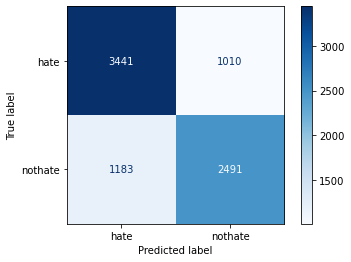

In [102]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(LR, X_test, y_test,cmap=plt.cm.Blues)

In [104]:
report = classification_report(y_test,yhat, output_dict = True)
report

{'hate': {'precision': 0.7441608996539792,
  'recall': 0.7730847000674006,
  'f1-score': 0.7583471074380166,
  'support': 4451},
 'nothate': {'precision': 0.7115109968580405,
  'recall': 0.6780076211213936,
  'f1-score': 0.6943554006968641,
  'support': 3674},
 'accuracy': 0.7300923076923077,
 'macro avg': {'precision': 0.72783594825601,
  'recall': 0.7255461605943971,
  'f1-score': 0.7263512540674404,
  'support': 8125},
 'weighted avg': {'precision': 0.7293971159158527,
  'recall': 0.7300923076923077,
  'f1-score': 0.7294110421374636,
  'support': 8125}}